In [6]:
#Airbnb Listing Analysis (Athens Data)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
listing = pd.read_csv('listings.csv')
listing.head(5)

id                                            name  host_id  host_name  \
0  10595             96m2, 3BR, 2BA, Metro, WI-FI etc...    37177  Emmanouil   
1  10990    Athens Quality Apartments - Deluxe Apartment    37177  Emmanouil   
2  10993              Athens Quality Apartments - Studio    37177  Emmanouil   
3  10995  AQA-No2 1-bedroom, smart tv, fiber connection,    37177  Emmanouil   
4  27262              54m2, 1-br, cable tv, wi-fi, metro    37177  Emmanouil   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt   
1                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448  Entire home/apt   
2                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98888   23.76473  Entire home/apt   
3                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98903   23.76448  Entire home/apt   
4                  NaN   ΑΜΠΕΛΟΚΗΠΟΙ  37.98924   23.76500  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     60               2                 26  2020-10-06               0.23   
1     36               1                 41  2020-09-30               0.41   
2     33               1                 52  2020-10-19               0.53   
3     36               1                 23  2020-10-03               0.18   
4     38               1                 17  2020-01-08               0.17   

   calculated_host_listings_count  availability_365  
0                               6               339  
1                               6               151  
2                               6               274  
3                               6               154  
4                               6               140

In [8]:
# always checking all variables whether they contain null or not as it will affect overall analysis
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9455 entries, 0 to 9454
Data columns (total 16 columns):
id                                9455 non-null int64
name                              9452 non-null object
host_id                           9455 non-null int64
host_name                         9451 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     9455 non-null object
latitude                          9455 non-null float64
longitude                         9455 non-null float64
room_type                         9455 non-null object
price                             9455 non-null int64
minimum_nights                    9455 non-null int64
number_of_reviews                 9455 non-null int64
last_review                       7272 non-null object
reviews_per_month                 7272 non-null float64
calculated_host_listings_count    9455 non-null int64
availability_365                  9455 non-null int64
dtypes: float64(4),

In [9]:
listing.describe()

id       host_id  neighbourhood_group     latitude  \
count  9.455000e+03  9.455000e+03                  0.0  9455.000000   
mean   2.864946e+07  1.318461e+08                  NaN    37.980053   
std    1.146347e+07  1.025103e+08                  NaN     0.013405   
min    1.059500e+04  3.717700e+04                  NaN    37.949280   
25%    2.105441e+07  3.509330e+07                  NaN    37.969140   
50%    3.002726e+07  1.197957e+08                  NaN    37.978410   
75%    3.786253e+07  2.154966e+08                  NaN    37.988160   
max    4.603472e+07  3.730263e+08                  NaN    38.034560   

         longitude         price  minimum_nights  number_of_reviews  \
count  9455.000000   9455.000000     9455.000000        9455.000000   
mean     23.731778     70.141195        3.433633          37.427922   
std       0.012365    416.017364       17.893770          64.294023   
min      23.697320      8.000000        1.000000           0.000000   
25%      23.724050     30.000000        1.000000           1.000000   
50%      23.729940     43.000000        2.000000           9.000000   
75%      23.738025     65.000000        2.000000          46.000000   
max      23.789530  20653.000000     1000.000000         714.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        7272.000000                     9455.000000       9455.000000  
mean            1.637207                        9.449709        254.109572  
std             1.735093                       17.541995        121.661204  
min             0.010000                        1.000000          0.000000  
25%             0.340000                        1.000000        168.000000  
50%             1.000000                        2.000000        316.000000  
75%             2.400000                        8.000000        360.000000  
max            14.210000                      101.000000        365.000000

I want to focus the analysis on the price as its one of consideration factor for customer to choose the listing. As we can see on the table above that the magnitude of the standard deviation is bigger than the mean, thus indicates that the data spread widely (outliers are present). 

In [10]:
new_price = listing['price'] 

In [11]:
plt.hist(new_price, bins=10)
plt.show()

In [12]:
#since the histogram can't fully show the distribution of the data it might be better using CDF
x = np.sort(new_price)
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.show()

After plotting the distribution it's time to see the relationship between variable. We can start from the price and availability.

In [13]:
price = listing['price']
availability = listing['availability_365']
plt.plot(price, availability, 'o', markersize= 3, alpha=0.03)
plt.show()

In [14]:
index_price = listing[listing['price'] > 1000].index
listing.drop(index_price, inplace=True)
listing.describe()

id       host_id  neighbourhood_group     latitude  \
count  9.441000e+03  9.441000e+03                  0.0  9441.000000   
mean   2.864860e+07  1.318588e+08                  NaN    37.980056   
std    1.146821e+07  1.025372e+08                  NaN     0.013408   
min    1.059500e+04  3.717700e+04                  NaN    37.949280   
25%    2.104260e+07  3.507347e+07                  NaN    37.969140   
50%    3.003205e+07  1.197750e+08                  NaN    37.978410   
75%    3.786874e+07  2.154966e+08                  NaN    37.988170   
max    4.603472e+07  3.730263e+08                  NaN    38.034560   

         longitude        price  minimum_nights  number_of_reviews  \
count  9441.000000  9441.000000     9441.000000        9441.000000   
mean     23.731785    58.422307        3.437030          37.452812   
std       0.012363    62.426298       17.906812          64.321535   
min      23.697320     8.000000        1.000000           0.000000   
25%      23.724050    30.000000        1.000000           1.000000   
50%      23.729940    43.000000        2.000000           9.000000   
75%      23.738030    65.000000        2.000000          46.000000   
max      23.789530  1000.000000     1000.000000         714.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        7262.000000                     9441.000000       9441.000000  
mean            1.638237                        9.434488        254.085796  
std             1.735634                       17.520574        121.663845  
min             0.010000                        1.000000          0.000000  
25%             0.340000                        1.000000        168.000000  
50%             1.000000                        2.000000        316.000000  
75%             2.407500                        8.000000        360.000000  
max            14.210000                      101.000000        365.000000

In [15]:
price_1 = listing['price']
avail = listing['availability_365']
plt.plot(price_1, avail, 'o', markersize= 4, alpha=0.02)
plt.show()

I have to filter the outlier data so the range isn't to wide. After replotting, there is no definite relationship between price and the availability during one year listing.

In [16]:
column = ['price', 'availability_365']
subset = listing[column]
subset.corr()

price  availability_365
price             1.000000          0.064862
availability_365  0.064862          1.000000

I futher continue to do the correlation test between two variables, and the result is the correlation between price and availability positively low. I now want to explore the neighbourhood and the listed availability. 

In [17]:
listing.neighbourhood.value_counts()

ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1732
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  820
ΝΕΟΣ ΚΟΣΜΟΣ                          720
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             688
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     579
ΠΑΓΚΡΑΤΙ                             409
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      405
ΚΟΛΩΝΑΚΙ                             317
ΑΚΡΟΠΟΛΗ                             317
ΑΜΠΕΛΟΚΗΠΟΙ                          292
ΘΗΣΕΙΟ                               281
ΚΕΡΑΜΕΙΚΟΣ                           241
ΚΥΨΕΛΗ                               234
ΠΕΤΡΑΛΩΝΑ                            230
ΣΤΑΔΙΟ                               174
ΙΛΙΣΙΑ                               173
ΓΟΥΔΙ                                150
ΖΑΠΠΕΙΟ                              141
ΛΥΚΑΒΗΤΤΟΣ                           137
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     122
ΠΑΤΗΣΙΑ                              117
ΝΙΡΒΑΝΑ                               93
ΓΚΥΖΗ                                 93
ΠΕΔΙΟ ΑΡΕΩΣ                           85
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ 

In [18]:
avg_price_loc = listing.groupby('neighbourhood').price.mean().sort_values()
avg_avail = listing.groupby('neighbourhood').availability_365.mean()

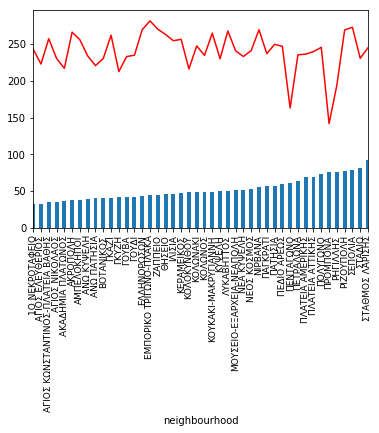

In [30]:
_ = avg_price_loc.plot(kind='bar')
_ = avg_avail.plot(kind='line', color='red')
plt.xticks(rotation=90, fontsize=9)
plt.xlabel("neighbourhood")
plt.show()

Neighbourhood area with low average of price relatively has high availability. These neighbourhood can be located outside the downtown area. 

In [57]:
location = listing[['latitude', 'longitude']]

In [63]:
location_list = location.values.tolist()

In [62]:
import folium
map = folium.Map(location=[37.98863, 23.76527], tiles='OpenStreetMap')
for point in range(0, len(location_list)):
    folium.CircleMarker(location_list[point], radius=4, color='blue', fill=True, opacity=0.4).add_to(map)
map    